In [21]:
import pandas as pd
import numpy as np
from datetime import datetime, time, timedelta
import requests
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("data/bangkok_traffy.csv")
df.sample(5)

,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity
356193,2023-GP7WDT,{ท่อระบายน้ำ},"เขตบางรัก,ฝ่ายโยธา เขตบางรัก",ท่อระบายน้ำตรงจุดที่แจ้งทั้งสองฝั่งอุดตันมีน้ำ...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.53538,13.72765",37 ซอย ศาลาแดง 2 แขวงสีลม เขตบางรัก กรุงเทพมหา...,สีลม,บางรัก,กรุงเทพมหานคร,2023-08-24 00:22:04.324854+00,เสร็จสิ้น,NaN,0,2023-08-25 04:38:21.401626+00
348991,2023-K6PQA7,"{ถนน,แสงสว่าง,ความปลอดภัย}","เขตพระโขนง,สำนักการจราจรและขนส่ง กรุงเทพมหานคร...",ป้ายรถเมล์หน้าโรมแรมวีว่าการ์เดนส์ ตรงข้ามตลาด...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.60465,13.69806",2000 ถ. สุขุมวิท แขวง บางจาก เขตพระโขนง กรุงเท...,พระโขนงใต้,พระโขนง,กรุงเทพมหานคร,2023-08-15 02:45:06.371261+00,เสร็จสิ้น,3.0,0,2023-08-24 06:28:20.032567+00
623890,2024-BMPYWB,{จราจร},"เขตพญาไท,สน.บางซื่อ,สำนักงานตำรวจแห่งชาติ (Roy...",มีการพื้นผิวจราจรเพื่อจอดรถ 24 ชั่วโมง จุดนี้ค...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.54832,13.78938",1 ถ. สุทธิสารวินิจฉัย แขวง สามเสนใน เขตพญาไท ก...,สามเสนใน,พญาไท,กรุงเทพมหานคร,2024-07-11 14:04:42.957008+00,กำลังดำเนินการ,NaN,0,2024-07-12 04:29:18.702905+00
585152,NaN,"{ถนน,น้ำท่วม}","เขตบางเขน,ฝ่ายโยธา เขตบางเขน,กรุงเทพโปร่งใส",NaN,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.62736,13.86408",NaN,อนุสาวรีย์,บางเขน,กรุงเทพมหานคร,2024-05-31 03:34:44.874038+00,เสร็จสิ้น,NaN,0,2024-09-03 01:50:36.355039+00
408524,2023-M338D2,{ความสะอาด},"กลุ่มงานเก็บขนมูลฝอย เขตบางเขน,เขตบางเขน,ฝ่ายร...",ขยะส่งกลิ่นเหม็น กระจายออกมานอกถนน คราวที่แล้ว...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.66787,13.86334",83/41 ถนน สยามธรณี แขวง ท่าแร้ง เขตบางเขน กรุง...,ท่าแร้ง,บางเขน,กรุงเทพมหานคร,2023-10-24 00:56:32.337256+00,เสร็จสิ้น,4.0,0,2023-10-26 09:59:48.798148+00


# Date

In [23]:
finished_df = df[df["state"] == "เสร็จสิ้น"]

In [24]:
filtered_df = finished_df.dropna(
    axis=0, how="any", subset=["timestamp", "last_activity"]
)

In [25]:
def toDate(serie):
    return pd.to_datetime(serie, format="ISO8601").dt.tz_localize(None) + timedelta(
        hours=7
    )


filtered_df["timestamp"] = toDate(filtered_df["timestamp"])
filtered_df["last_activity"] = toDate(filtered_df["last_activity"])

filtered_df["duration"] = (
    filtered_df["last_activity"] - filtered_df["timestamp"]
).dt.total_seconds() // 60
filtered_df.sample(5)

,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity,duration
657612,2024-A262AA,{},"ฝ่ายสิ่งแวดล้อม แขวงจันทรเกษม จตุจักร,เขตจตุจั...",ลูกกอล์ฟหล่นใส่หลังคาบ้านอีกแล้วเมื่อวันที่ 18...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.58907,13.82578",1378 ซอย รัชดาภิเษก 36 แยก 9-3-4-15 แขวงจันทรเ...,จันทรเกษม,จตุจักร,กรุงเทพมหานคร,2024-08-19 09:14:55.474769,เสร็จสิ้น,NaN,0,2024-08-21 13:53:44.764798,3158.0
376826,2023-CMRK68,{ป้าย},"เขตดุสิต,สำนักการจราจรและขนส่ง กรุงเทพมหานคร (...",เก้าอี้นั้งรอป้ายรถเมล์หักครับ ป้ายรถเมล์หน้าส...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.50954,13.77772",มหาวิทยาลัยราชภัฏสวนสุนันทา แขวง ดุสิต เขตดุสิ...,ดุสิต,ดุสิต,กรุงเทพมหานคร,2023-09-19 12:18:19.167330,เสร็จสิ้น,5.0,0,2023-10-09 14:10:38.676950,28912.0
205208,2023-ET492E,{},"เขตจตุจักร,ฝ่ายเทศกิจ เขตจตุจักร",บริเวณปากซอยลาดพร้าว 18 แยก 4 ติดกำแพงบ้าน มีค...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.56996,13.80633",89/1-2 ถ. ลาดพร้าว แขวง จอมพล เขตจตุจักร กรุงเ...,จอมพล,จตุจักร,กรุงเทพมหานคร,2023-01-26 13:27:39.380141,เสร็จสิ้น,5.0,0,2023-02-09 14:45:49.653544,20238.0
324958,2023-CXMNRT,{ความปลอดภัย},เขตบางพลัด,บ้านในซอยมีการก่อสร้าง ผู้รับเหมาหยุดพักงานแล้...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.50838,13.80557",277 ซอย จรัญสนิทวงศ์ 97 แขวงบางอ้อ เขตบางพลัด ...,บางอ้อ,บางพลัด,กรุงเทพมหานคร,2023-07-16 13:03:33.635692,เสร็จสิ้น,5.0,0,2023-07-24 17:16:20.715067,11772.0
523200,2024-MVMEAL,{},"เขตจตุจักร,องค์การขนส่งมวลชนกรุงเทพ (ขสมก.),สำ...",โละทิ้งเมื่อไหร่\nรถเมล์แดง ควันดำเยอะมาก\n\nร...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.57940,13.84628",1 1 ซอย พหลโยธิน 40 แขวงเสนานิคม เขตจตุจักร กร...,ลาดยาว,จตุจักร,กรุงเทพมหานคร,2024-03-11 18:34:57.126329,เสร็จสิ้น,1.0,0,2024-04-23 11:36:34.058065,61501.0


In [26]:
filtered_df["type"].fillna("{}", inplace=True)
filtered_df["type"].isna().sum()

/var/folders/06/w6kt9p1529vdfxw92dxt_6pc0000gn/T/ipykernel_49417/2577090291.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df["type"].fillna("{}", inplace=True)


0

In [27]:
# Define allowed categories
target_types = {
    "",
    "ป้าย",
    "ความสะอาด",
    "แสงสว่าง",
    "สอบถาม",
    "ร้องเรียน",
    "การเดินทาง",
    "จราจร",
    "ท่อระบายน้ำ",
    "สะพาน",
    "เสียงรบกวน",
    "ต้นไม้",
    "คนจรจัด",
    "คลอง",
    "ถนน",
    "เสนอแนะ",
    "กีดขวาง",
    "สายไฟ",
    "PM2.5",
    "น้ำท่วม",
    "ทางเท้า",
    "สัตว์จรจัด",
    "ความปลอดภัย",
    "ห้องน้ำ",
    "ป้ายจราจร",
}


# Function to convert string to list
def parse_categories(s):
    # Remove curly braces and split
    return s.strip("{}").split(",")


# Parse the string column
filtered_df["type_list"] = filtered_df["type"].apply(parse_categories)

# Create binary flags
for cat in target_types:
    filtered_df[cat] = filtered_df["type_list"].apply(lambda lst: int(cat in lst))

# Create 'Others' column
filtered_df["Others"] = filtered_df["type_list"].apply(
    lambda lst: int(any(c not in target_types for c in lst))
)

# Drop intermediate column if you want
filtered_df.drop(columns="type_list", inplace=True)

filtered_df[["type"] + list(target_types)].sample(5)

,type,,ถนน,แสงสว่าง,จราจร,สอบถาม,น้ำท่วม,การเดินทาง,สายไฟ,สัตว์จรจัด,...,กีดขวาง,ต้นไม้,คนจรจัด,ป้ายจราจร,ทางเท้า,ร้องเรียน,คลอง,PM2.5,เสียงรบกวน,ห้องน้ำ
197739,{},1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166464,"{เสียงรบกวน,ร้องเรียน}",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
344866,"{ถนน,ทางเท้า}",0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
367564,{ต้นไม้},0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
461524,{คนจรจัด},0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [28]:
# Define working hours
start_time = time(9, 30)
end_time = time(15, 30)


def minutes_to_next_working_hour(dt):
    weekday = dt.weekday()  # 0 = Monday, ..., 6 = Sunday
    current_time = dt.time()

    # If it's a weekend or after working hours, find next weekday at 9:30
    if weekday >= 5 or current_time >= end_time:
        # Add days until next weekday (Monday–Friday)
        days_ahead = 1
        while (dt + timedelta(days=days_ahead)).weekday() >= 5:
            days_ahead += 1
        next_working_start = datetime.combine(
            (dt + timedelta(days=days_ahead)).date(), start_time
        )
        return int((next_working_start - dt).total_seconds() // 60)

    # Before work hours today
    elif current_time < start_time:
        today_start = datetime.combine(dt.date(), start_time)
        return int((today_start - dt).total_seconds() // 60)

    # During working hours
    else:
        return 0


# Apply function to timestamp column
filtered_df["until_working_time"] = filtered_df["timestamp"].apply(
    minutes_to_next_working_hour
)

filtered_df[["timestamp", "until_working_time"]].sample(5)

,timestamp,until_working_time
748466,2024-11-29 20:32:07.368140,3657
537667,2024-03-30 03:23:47.609789,3246
40355,2022-06-21 08:57:15.441516,32
321260,2023-07-12 07:15:39.934111,134
2641,2022-06-01 15:00:16.487276,0


# Org's info

In [29]:
limit = 100
org_key = "bangkok"
url = f"https://publicapi.traffy.in.th/premium-org-fondue/statistic-rank/top-rank-avg-star?org_key={org_key}&limit={limit}"

resp = requests.get(url)
data = resp.json()
orgs = data["results"]

pd.DataFrame(orgs).to_csv("data/org.csv")

In [30]:
orgs = pd.read_csv("data/org.csv")
orgs.sample(5)
orgs.drop(columns=["Unnamed: 0"], inplace=True)
# orgs.reset_index(inplace=True)
orgs.set_index("fonduegroup_name", inplace=True)
orgs.sample(5)

,rank,timestamp,fonduegroup_id,post_count_star,post_count_star_stat,avg_star,post_count_all,post_count_finish,post_finish_percentage,avg_duration_minutes_inprogress,avg_duration_minutes_finished
fonduegroup_name,,,,,,,,,,,
เขตบางเขน,16,NaN,18024,9940,"{'star_1': 1297, 'star_2': 409, 'star_3': 873,...",4.00,25094,21582,86.00,8212,65495
เขตคลองเตย,56,NaN,18055,9772,"{'star_1': 1860, 'star_2': 488, 'star_3': 975,...",3.72,31350,24670,78.69,27258,92029
เขตบางคอแหลม,3,NaN,18025,5188,"{'star_1': 607, 'star_2': 164, 'star_3': 340, ...",4.15,14165,11748,82.94,5961,57230
เขตหนองแขม,26,NaN,18052,3777,"{'star_1': 574, 'star_2': 149, 'star_3': 300, ...",3.96,12418,11281,90.84,8510,57919
สำนักเทศกิจ กทม.,44,NaN,18123,378,"{'star_1': 74, 'star_2': 16, 'star_3': 35, 'st...",3.81,2288,2140,93.53,20753,48083


In [31]:
# Define target columns
target_cols = ["avg_star", "post_finish_percentage", "avg_duration_minutes_finished"]

# Convert organization string to list
filtered_df["orgs_list"] = filtered_df["organization"].str.strip().str.split(",")

# Create filtered_df with NaNs in target columns
filtered_df[target_cols] = np.nan

# Explode orgs_list to merge with orgs
exploded = filtered_df[["orgs_list"]].explode("orgs_list").reset_index()
exploded["orgs_list"] = exploded["orgs_list"].str.strip()

# Join with orgs DataFrame
merged = exploded.merge(
    orgs[target_cols], left_on="orgs_list", right_index=True, how="left"
)

# Aggregate mean values for each original row
means = merged.groupby("index")[target_cols].mean()

# Assign the means back to filtered_df
filtered_df.loc[means.index, target_cols] = means

# Result
filtered_df[["orgs_list"] + target_cols]

filtered_df.drop(columns=["orgs_list"], inplace=True)

In [32]:
filtered_df.columns

Index(['ticket_id', 'type', 'organization', 'comment', 'photo', 'photo_after',
       'coords', 'address', 'subdistrict', 'district', 'province', 'timestamp',
       'state', 'star', 'count_reopen', 'last_activity', 'duration', '', 'ถนน',
       'แสงสว่าง', 'จราจร', 'สอบถาม', 'น้ำท่วม', 'การเดินทาง', 'สายไฟ',
       'สัตว์จรจัด', 'ความสะอาด', 'ป้าย', 'ท่อระบายน้ำ', 'ความปลอดภัย',
       'เสนอแนะ', 'สะพาน', 'กีดขวาง', 'ต้นไม้', 'คนจรจัด', 'ป้ายจราจร',
       'ทางเท้า', 'ร้องเรียน', 'คลอง', 'PM2.5', 'เสียงรบกวน', 'ห้องน้ำ',
       'Others', 'until_working_time', 'avg_star', 'post_finish_percentage',
       'avg_duration_minutes_finished'],
      dtype='object')

In [33]:
def plot_bin(s, bins=100):
    s.plot(kind="hist", bins=bins, edgecolor="black")

    # Add labels and title
    plt.xlabel("duration (minutes)")
    plt.ylabel("Frequency")

    # Show plot
    plt.show()

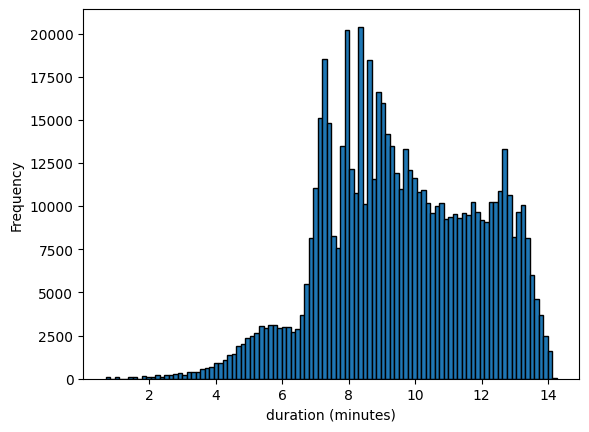

In [34]:
filtered_df = filtered_df[filtered_df["duration"] > 0]

filtered_df["log_duration"] = filtered_df["duration"].apply(np.log1p)

plot_bin(filtered_df["log_duration"])

In [35]:
# # Assuming `s` is your Pandas Series
# s = filtered_df['log_duration']
# Q1 = s.quantile(0.25)
# Q3 = s.quantile(0.75)
# IQR = Q3 - Q1

# # Define bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter out outliers
# filtered_df = filtered_df[(s >= lower_bound) & (s <= upper_bound)]

# s_filtered = filtered_df['log_duration']

# plot_bin(s_filtered)

## Cut outlier

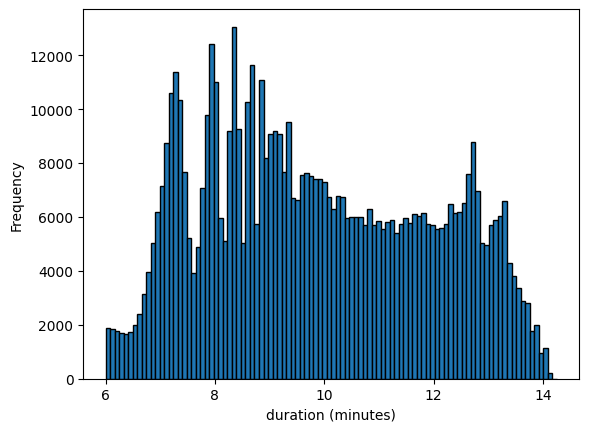

In [36]:
lower_bound = 6
upper_bound = 20

log_duration = filtered_df["log_duration"]
filtered_df = filtered_df[(log_duration >= lower_bound) & (log_duration <= upper_bound)]

plot_bin(filtered_df["log_duration"])

In [37]:
types = [
    "ป้าย",
    "ความสะอาด",
    "แสงสว่าง",
    "สอบถาม",
    "ร้องเรียน",
    "การเดินทาง",
    "จราจร",
    "ท่อระบายน้ำ",
    "สะพาน",
    "เสียงรบกวน",
    "ต้นไม้",
    "คนจรจัด",
    "คลอง",
    "ถนน",
    "เสนอแนะ",
    "กีดขวาง",
    "สายไฟ",
    "PM2.5",
    "น้ำท่วม",
    "ทางเท้า",
    "สัตว์จรจัด",
    "ความปลอดภัย",
    "ห้องน้ำ",
    "ป้ายจราจร",
    "Others",
]

feature_cols = [
    "until_working_time",
    "avg_star",
    "post_finish_percentage",
    "avg_duration_minutes_finished",
]

target_cols = [
    "duration",
    "log_duration",
]

cols = target_cols + feature_cols + types

filtered_df = filtered_df[cols]
filtered_df

,duration,log_duration,until_working_time,avg_star,post_finish_percentage,avg_duration_minutes_finished,ป้าย,ความสะอาด,แสงสว่าง,สอบถาม,...,กีดขวาง,สายไฟ,PM2.5,น้ำท่วม,ทางเท้า,สัตว์จรจัด,ความปลอดภัย,ห้องน้ำ,ป้ายจราจร,Others
0,394723.0,12.885942,3698,4.08,84.960,85382.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,395605.0,12.888174,693,3.82,84.270,76452.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,364093.0,12.805167,1286,3.86,84.440,54800.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,473630.0,13.068184,944,4.08,84.960,85382.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,353929.0,12.776854,840,4.09,85.380,50057.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786715,701.0,6.553933,780,3.88,77.640,94128.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
786740,781.0,6.661855,753,3.93,80.520,80750.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
786788,720.0,6.580639,692,3.93,80.520,80750.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
786844,533.0,6.280396,548,3.88,82.480,75084.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
na_cols = ["avg_star", "post_finish_percentage", "avg_duration_minutes_finished"]

filtered_df[na_cols] = filtered_df[na_cols].fillna(filtered_df[na_cols].mean())

In [39]:
filtered_df.isna().sum()

duration                         0
log_duration                     0
until_working_time               0
avg_star                         0
post_finish_percentage           0
avg_duration_minutes_finished    0
ป้าย                             0
ความสะอาด                        0
แสงสว่าง                         0
สอบถาม                           0
ร้องเรียน                        0
การเดินทาง                       0
จราจร                            0
ท่อระบายน้ำ                      0
สะพาน                            0
เสียงรบกวน                       0
ต้นไม้                           0
คนจรจัด                          0
คลอง                             0
ถนน                              0
เสนอแนะ                          0
กีดขวาง                          0
สายไฟ                            0
PM2.5                            0
น้ำท่วม                          0
ทางเท้า                          0
สัตว์จรจัด                       0
ความปลอดภัย                      0
ห้องน้ำ             

In [41]:
display(filtered_df)
filtered_df.to_csv("data/clean.csv", index=False)

,duration,log_duration,until_working_time,avg_star,post_finish_percentage,avg_duration_minutes_finished,ป้าย,ความสะอาด,แสงสว่าง,สอบถาม,...,กีดขวาง,สายไฟ,PM2.5,น้ำท่วม,ทางเท้า,สัตว์จรจัด,ความปลอดภัย,ห้องน้ำ,ป้ายจราจร,Others
0,394723.0,12.885942,3698,4.08,84.960,85382.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,395605.0,12.888174,693,3.82,84.270,76452.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,364093.0,12.805167,1286,3.86,84.440,54800.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,473630.0,13.068184,944,4.08,84.960,85382.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,353929.0,12.776854,840,4.09,85.380,50057.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786715,701.0,6.553933,780,3.88,77.640,94128.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
786740,781.0,6.661855,753,3.93,80.520,80750.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
786788,720.0,6.580639,692,3.93,80.520,80750.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
786844,533.0,6.280396,548,3.88,82.480,75084.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
rain_df = pd.read_csv("data/rain_data.csv")
filtered_df["date"] = filtered_df["timestamp"].dt.date.astype(str)
rain_df.head(1)

KeyError: 'timestamp'